In [46]:
import pandas as pd
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

df = pd.read_csv('dataframe.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,km,year,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else,Manufacturer
0,4400,2021,1811,110000,2,1998.0,0,0,1,1,0,1,0,0,0,17
1,75000,2019,1102,60000,1,1248.0,0,0,1,1,0,1,0,0,0,35
2,46000,2021,4731,243000,1,1995.0,0,0,1,1,0,1,0,0,0,7
3,16000,2021,1529,97000,3,998.0,0,0,1,1,0,0,1,0,0,35
4,33000,2020,4731,347000,1,1991.0,1,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8724,28000,2019,1102,80900,1,1248.0,0,0,1,1,0,1,0,0,0,35
8725,150730,2016,1693,74900,2,1591.0,0,0,1,1,0,1,0,0,0,35
8726,110000,2019,2019,135744,1,1998.0,0,0,1,1,0,1,0,0,0,17
8727,135000,2018,2563,140650,4,1984.0,0,0,1,1,0,1,0,0,0,1


In [47]:
X = df.drop(['price'], axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('R2 on train set:',regressor.score(X_train, y_train))
print('R2 on test set:',regressor.score(X_test, y_test))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

R2 on train set: 0.8782059322598702
R2 on test set: 0.8770827773177822
RMSE: 33695.88422366663


In [54]:
resultsDf = pd.DataFrame({"Real Price" : y_test , "Prediction price" : y_pred})
resultsDf["difference"] = abs(resultsDf["Real Price"] - resultsDf["Prediction price"])
resultsDf

,Real Price,Prediction price,difference
1035,88000,98179.488372,10179.488372
5227,350000,354119.877813,4119.877813
532,188900,238043.473744,49143.473744
7933,158000,174800.879549,16800.879549
5832,55900,83453.024202,27553.024202
...,...,...,...
2572,62000,64276.944810,2276.944810
3037,185000,228950.800870,43950.800870
3646,105000,120605.941645,15605.941645
1292,124900,120495.465807,4404.534193


In [59]:
resultsDf.sort_values(by=['difference'], ascending=True, inplace = True)
resultsDf

,Real Price,Prediction price,difference
384,95000,95015.435489,15.435489
2076,105000,105022.818473,22.818473
4164,99000,99025.316157,25.316157
6907,70000,70032.766438,32.766438
533,54000,54067.737109,67.737109
...,...,...,...
7502,405000,220924.663084,184075.336916
8390,439000,254585.425762,184414.574238
7016,449000,263718.629161,185281.370839
7694,389000,199947.629615,189052.370385


Text(0.5, 0, 'Car')

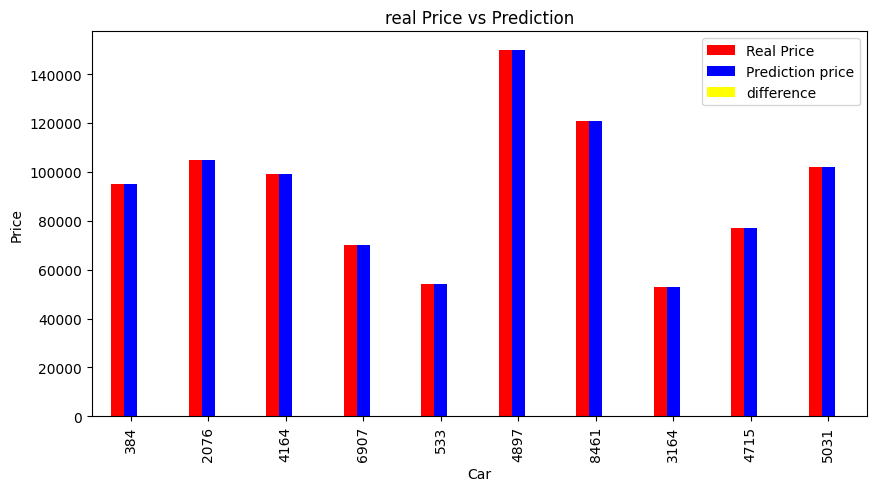

In [61]:
resultsDf.head(10).plot(kind = 'bar' , figsize = (10,5) , color= ['red' , 'blue' , 'yellow'])
plt.title("real Price vs Prediction")
plt.ylabel("Price")
plt.xlabel("Car")

Text(0.5, 0, 'Car')

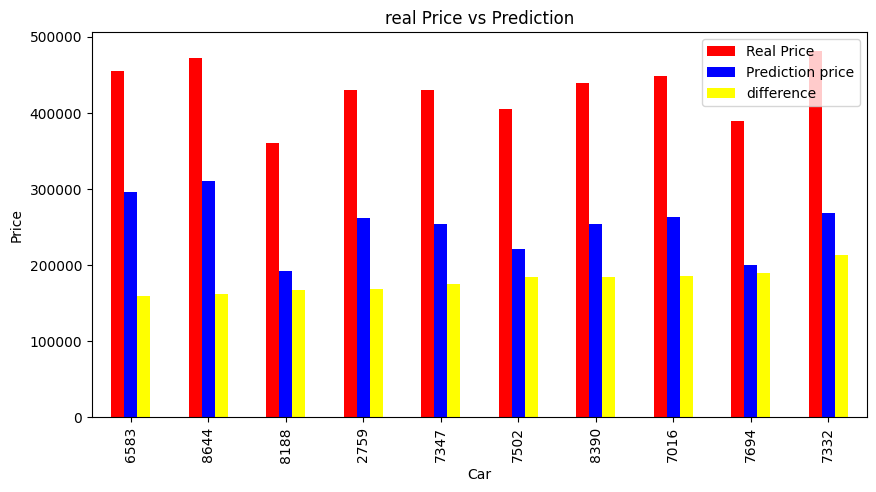

In [62]:
resultsDf.tail(10).plot(kind = 'bar' , figsize = (10,5) , color= ['red' , 'blue' , 'yellow'])
plt.title("real Price vs Prediction")
plt.ylabel("Price")
plt.xlabel("Car")